# Ejercicio 2: Comparación de Parámetros en el Filtro de Kalman

**Guía de Aprendizaje - Fase 3: Filtrado de Series de Tiempo y Transformaciones en el Dominio de la Frecuencia**

---

## Objetivo
Comparar el desempeño del filtro de Kalman al variar los parámetros de la matriz de covarianza del proceso (Q) y la matriz de covarianza de la observación (R), utilizando datos reales de movimiento en 2D.

## Actividades
- Cargar el dataset real.
- Implementar el filtro de Kalman con diferentes valores de Q y R.
- Visualizar y comparar los resultados.
- Analizar el efecto de los parámetros en la estimación y la convergencia.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos reales de movimiento en 2D
file_path = 'Appendix 1 - xy_motion_kalman_filter_example.csv'
data = pd.read_csv(file_path, header=None)
# Asignar encabezado a las columnas
data.columns = ['x', 'y']
data.head()
# Mostrar las primeras filas
data.head()

,x,y
0,2.35,1.45
1,3.55,1.80
2,3.00,2.90
3,2.65,4.20
4,2.95,5.15


### Estructura de los datos
El dataset contiene mediciones de posición en 2D (`x`, `y`) en diferentes instantes de tiempo. Estas observaciones serán utilizadas para comparar el desempeño del filtro de Kalman bajo diferentes configuraciones de parámetros. En este ejercicio, solo se utilizan las columnas de posición (`x`, `y`).

In [2]:
# Inicialización de parámetros y matrices para el caso 2D (solo x, y)
n = 2  # Estado: [x, y]
m = 2  # Observación: [x, y]

# Matriz de transición de estado (modelo de movimiento constante en posición)
F = np.array([[1, 0],
              [0, 1]])

# Matriz de observación
H = np.eye(2)

# Estado inicial (primeras observaciones)
x0 = data.iloc[0][['x', 'y']].values.reshape(-1, 1)

# Covarianza inicial
P0 = np.eye(n)

# Parámetros a comparar
Q_list = [np.eye(n)*0.01, np.eye(n)*0.1, np.eye(n)*1.0]
R_list = [np.eye(m)*0.01, np.eye(m)*0.1, np.eye(m)*1.0]

# Número de pasos
N = len(data)

### Comparación de parámetros Q y R

Se analizará el desempeño del filtro de Kalman para diferentes valores de la matriz de covarianza del proceso (Q) y la matriz de covarianza de la observación (R). Para cada combinación, se graficarán las estimaciones y se analizará la convergencia.

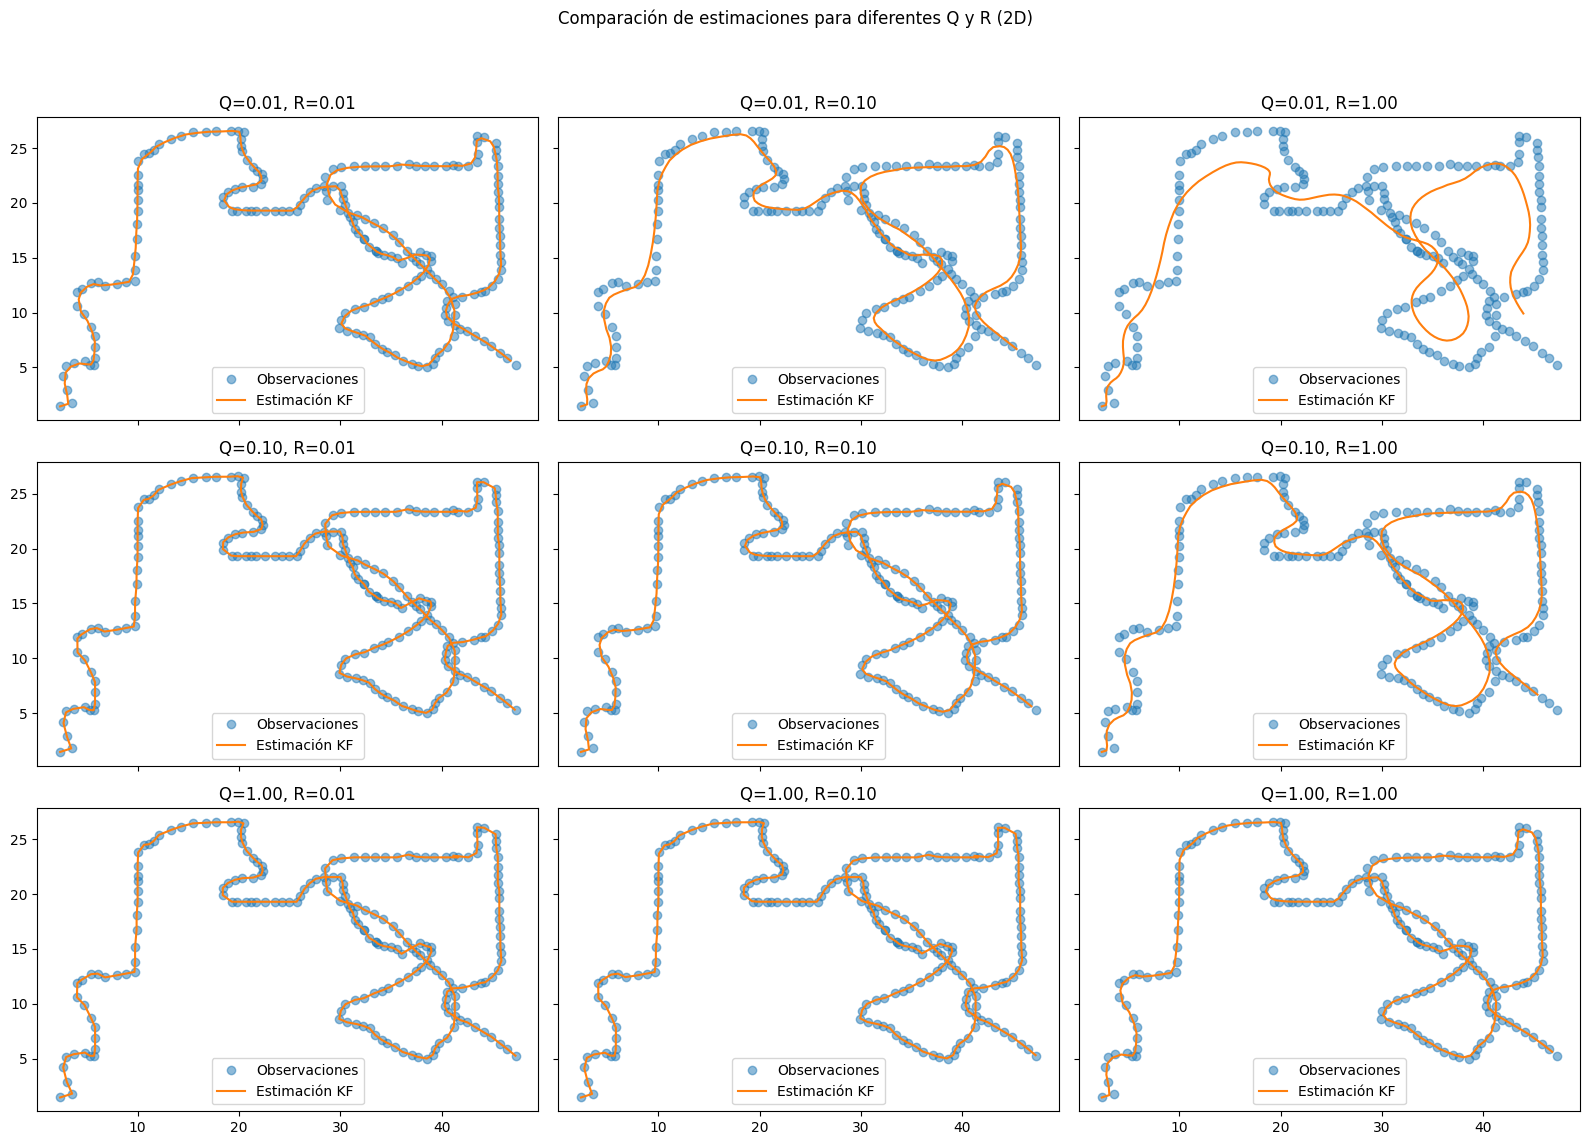

In [3]:
# Función para ejecutar el filtro de Kalman en 2D
def run_kalman_filter(F, H, Q, R, x0, P0, data):
    N = len(data)
    x_estimates = np.zeros((N, 2))
    P = P0.copy()
    x = x0.copy()
    for i in range(N):
        # Predicción
        x_pred = F @ x
        P_pred = F @ P @ F.T + Q
        # Observación
        z = data.iloc[i][['x', 'y']].values.reshape(-1, 1)
        # Ganancia de Kalman
        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)
        # Actualización
        x = x_pred + K @ (z - H @ x_pred)
        P = (np.eye(2) - K @ H) @ P_pred
        x_estimates[i] = x.flatten()
    return x_estimates

# Ejecutar y graficar para cada combinación de Q y R
fig, axes = plt.subplots(len(Q_list), len(R_list), figsize=(16, 12), sharex=True, sharey=True)
for i, Q in enumerate(Q_list):
    for j, R in enumerate(R_list):
        x_est = run_kalman_filter(F, H, Q, R, x0, P0, data)
        ax = axes[i, j]
        ax.plot(data['x'], data['y'], 'o', label='Observaciones', alpha=0.5)
        ax.plot(x_est[:,0], x_est[:,1], '-', label='Estimación KF')
        ax.set_title(f'Q={Q[0,0]:.2f}, R={R[0,0]:.2f}')
        ax.legend()
plt.suptitle('Comparación de estimaciones para diferentes Q y R (2D)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Análisis de resultados

En los gráficos anteriores se observa cómo la estimación del filtro de Kalman varía según los valores de Q y R:
- **Q bajo, R bajo:** El filtro confía mucho en el modelo y en las observaciones, estimaciones suaves y cercanas a los datos.
- **Q alto:** El filtro asume mayor incertidumbre en el modelo, por lo que responde más rápido a cambios y puede ser más sensible al ruido.
- **R alto:** El filtro confía menos en las observaciones, por lo que la estimación depende más del modelo y puede tardar más en ajustarse a los datos reales.

La convergencia y la precisión del filtro dependen del balance entre Q y R. Ajustar estos parámetros permite optimizar el desempeño del filtro para diferentes escenarios y niveles de ruido.